In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize


In [92]:
df = pd.read_csv(r'C:\Users\donga\Downloads\Breast Cancer METABRIC.csv')
df

Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0       MB-0000             75.65             Mastectomy  Breast Cancer   
1       MB-0002             43.19      Breast Conserving  Breast Cancer   
2       MB-0005             48.87             Mastectomy  Breast Cancer   
3       MB-0006             47.68             Mastectomy  Breast Cancer   
4       MB-0008             76.97             Mastectomy  Breast Cancer   
...         ...               ...                    ...            ...   
2504  MTS-T2428             70.05                    NaN  Breast Cancer   
2505  MTS-T2429             63.60                    NaN  Breast Cancer   
2506  MTS-T2430               NaN                    NaN  Breast Cancer   
2507  MTS-T2431               NaN                    NaN  Breast Cancer   
2508  MTS-T2432               NaN                    NaN  Breast Cancer   

                           Cancer Type Detailed Cellularity Chemotherapy  \
0              Breast Invasive Ductal Carcinoma         NaN           No   
1              Breast Invasive Ductal Carcinoma        High           No   
2              Breast Invasive Ductal Carcinoma        High          Yes   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4     Breast Mixed Ductal and Lobular Carcinoma        High          Yes   
...                                         ...         ...          ...   
2504                  Invasive Breast Carcinoma         NaN          NaN   
2505                  Invasive Breast Carcinoma         NaN          NaN   
2506                  Invasive Breast Carcinoma         NaN          NaN   
2507                  Invasive Breast Carcinoma         NaN          NaN   
2508                  Invasive Breast Carcinoma         NaN          NaN   

     Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
0                    claudin-low     1.0                   Positve  ...   
1                           LumA     1.0                   Positve  ...   
2                           LumB     1.0                   Positve  ...   
3                           LumB     1.0                   Positve  ...   
4                           LumB     1.0                   Positve  ...   
...                          ...     ...                       ...  ...   
2504                         NaN     1.0                   Positve  ...   
2505                         NaN     1.0                   Positve  ...   
2506                         NaN     NaN                       NaN  ...   
2507                         NaN     NaN                       NaN  ...   
2508                         NaN     NaN                       NaN  ...   

     Overall Survival Status  PR Status Radio Therapy  \
0                     Living   Negative           Yes   
1                     Living   Positive           Yes   
2                   Deceased   Positive            No   
3                     Living   Positive           Yes   
4                   Deceased   Positive           Yes   
...                      ...        ...           ...   
2504                     NaN        NaN           NaN   
2505                     NaN        NaN           NaN   
2506                     NaN        NaN           NaN   
2507                     NaN        NaN           NaN   
2508                     NaN        NaN           NaN   

     Relapse Free Status (Months) Relapse Free Status     Sex  \
0                          138.65        Not Recurred  Female   
1                           83.52        Not Recurred  Female   
2                          151.28            Recurred  Female   
3                          162.76        Not Recurred  Female   
4                           18.55            Recurred  Female   
...                           ...                 ...     ...   
2504                         4.93            Recurred  Female   
2505                        16.18            Recurred  Female   
2506                

In [95]:
df.head()

Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
0                 claudin-low     1.0                   Positve  ...   
1                        LumA     1.0                   Positve  ...   
2                        LumB     1.0                   Positve  ...   
3                        LumB     1.0                   Positve  ...   
4                        LumB     1.0                   Positve  ...   

  Overall Survival Status  PR Status Radio Therapy  \
0                  Living   Negative           Yes   
1                  Living   Positive           Yes   
2                Deceased   Positive            No   
3                  Living   Positive           Yes   
4                Deceased   Positive           Yes   

  Relapse Free Status (Months) Relapse Free Status     Sex  \
0                       138.65        Not Recurred  Female   
1                        83.52        Not Recurred  Female   
2                       151.28            Recurred  Female   
3                       162.76        Not Recurred  Female   
4                        18.55            Recurred  Female   

  3-Gene classifier subtype Tumor Size Tumor Stage  Patient's Vital Status  
0                 ER-/HER2-       22.0         2.0                  Living  
1     ER+/HER2- High Prolif       10.0         1.0                  Living  
2                       NaN       15.0         2.0         Died of Disease  
3                       NaN       25.0         2.0                  Living  
4     ER+/HER2- High Prolif       40.0         2.0         Died of Disease  

[5 rows x 34 columns]

In [96]:
df.tail()

Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
2504  MTS-T2428             70.05                    NaN  Breast Cancer   
2505  MTS-T2429             63.60                    NaN  Breast Cancer   
2506  MTS-T2430               NaN                    NaN  Breast Cancer   
2507  MTS-T2431               NaN                    NaN  Breast Cancer   
2508  MTS-T2432               NaN                    NaN  Breast Cancer   

           Cancer Type Detailed Cellularity Chemotherapy  \
2504  Invasive Breast Carcinoma         NaN          NaN   
2505  Invasive Breast Carcinoma         NaN          NaN   
2506  Invasive Breast Carcinoma         NaN          NaN   
2507  Invasive Breast Carcinoma         NaN          NaN   
2508  Invasive Breast Carcinoma         NaN          NaN   

     Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
2504                         NaN     1.0                   Positve  ...   
2505                         NaN     1.0                   Positve  ...   
2506                         NaN     NaN                       NaN  ...   
2507                         NaN     NaN                       NaN  ...   
2508                         NaN     NaN                       NaN  ...   

     Overall Survival Status  PR Status Radio Therapy  \
2504                     NaN        NaN           NaN   
2505                     NaN        NaN           NaN   
2506                     NaN        NaN           NaN   
2507                     NaN        NaN           NaN   
2508                     NaN        NaN           NaN   

     Relapse Free Status (Months) Relapse Free Status     Sex  \
2504                         4.93            Recurred  Female   
2505                        16.18            Recurred  Female   
2506                          NaN                 NaN  Female   
2507                          NaN                 NaN  Female   
2508                          NaN                 NaN  Female   

     3-Gene classifier subtype Tumor Size Tumor Stage  Patient's Vital Status  
2504                       NaN       27.0         1.0                     NaN  
2505                       NaN       28.0         2.0                     NaN  
2506                       NaN        NaN         0.0                     NaN  
2507                       NaN        NaN         0.0                     NaN  
2508                       NaN        NaN         0.0                     NaN  

[5 rows x 34 columns]

In [97]:
df.isnull().sum()

Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therap

In [98]:
df['Age at Diagnosis'].fillna(df['Age at Diagnosis'].median(), inplace=True)
df['Type of Breast Surgery'].fillna(df['Type of Breast Surgery'].mode()[0], inplace=True)
df['Cellularity'].fillna(df['Cellularity'].mode()[0], inplace=True)
df['Chemotherapy'].fillna(df['Chemotherapy'].mode()[0], inplace=True)
df['Pam50 + Claudin-low subtype'].fillna(df['Pam50 + Claudin-low subtype'].mode()[0], inplace=True)
df['Cohort'].fillna(df['Cohort'].mode()[0], inplace=True)
df['ER status measured by IHC'].fillna(df['ER status measured by IHC'].mode()[0], inplace=True)
df['ER Status'].fillna(df['ER Status'].mode()[0], inplace=True)
df['Neoplasm Histologic Grade'].fillna(df['Neoplasm Histologic Grade'].mode()[0], inplace=True)
df['HER2 status measured by SNP6'].fillna(df['HER2 status measured by SNP6'].mode()[0], inplace=True)
df['HER2 Status'].fillna(df['HER2 Status'].mode()[0], inplace=True)
df['Tumor Other Histologic Subtype'].fillna(df['Tumor Other Histologic Subtype'].mode()[0], inplace=True)
df['Hormone Therapy'].fillna(df['Hormone Therapy'].mode()[0], inplace=True)
df['Inferred Menopausal State'].fillna(df['Inferred Menopausal State'].mode()[0], inplace=True)
df['Integrative Cluster'].fillna(df['Integrative Cluster'].mode()[0], inplace=True)
df['Primary Tumor Laterality'].fillna(df['Primary Tumor Laterality'].mode()[0], inplace=True)
df['Lymph nodes examined positive'].fillna(df['Lymph nodes examined positive'].median(), inplace=True)
df['Mutation Count'].fillna(df['Mutation Count'].median(), inplace=True)
df['Nottingham prognostic index'].fillna(df['Nottingham prognostic index'].median(), inplace=True)
df['Overall Survival (Months)'].fillna(df['Overall Survival (Months)'].median(), inplace=True)
df['Overall Survival Status'].fillna(df['Overall Survival Status'].mode()[0], inplace=True)
df['PR Status'].fillna(df['PR Status'].mode()[0], inplace=True)
df['Radio Therapy'].fillna(df['Radio Therapy'].mode()[0], inplace=True)
df['Relapse Free Status (Months)'].fillna(df['Relapse Free Status (Months)'].median(), inplace=True)
df['Relapse Free Status'].fillna(df['Relapse Free Status'].mode()[0], inplace=True)
df['3-Gene classifier subtype'].fillna(df['3-Gene classifier subtype'].mode()[0], inplace=True)
df['Tumor Size'].fillna(df['Tumor Size'].median(), inplace=True)
df['Tumor Stage'].fillna(df['Tumor Stage'].mode()[0], inplace=True)
df['Patient\'s Vital Status'].fillna(df['Patient\'s Vital Status'].mode()[0], inplace=True)

C:\Users\donga\AppData\Local\Temp\ipykernel_18572\1574716887.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age at Diagnosis'].fillna(df['Age at Diagnosis'].median(), inplace=True)
C:\Users\donga\AppData\Local\Temp\ipykernel_18572\1574716887.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [99]:
df.isnull().sum()

Patient ID                        0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)

In [100]:
df.shape

(2509, 34)

In [101]:
df.describe()

Age at Diagnosis       Cohort  Neoplasm Histologic Grade  \
count       2509.000000  2509.000000                2509.000000   
mean          60.423324     2.891989                   2.440415   
std           13.004464     1.961931                   0.645912   
min           21.930000     1.000000                   1.000000   
25%           50.940000     1.000000                   2.000000   
50%           61.110000     3.000000                   3.000000   
75%           70.000000     4.000000                   3.000000   
max           96.290000     9.000000                   3.000000   

       Lymph nodes examined positive  Mutation Count  \
count                    2509.000000     2509.000000   
mean                        1.743723        5.543643   
std                         3.845927        3.848324   
min                         0.000000        1.000000   
25%                         0.000000        3.000000   
50%                         0.000000        5.000000   
75%                         2.000000        7.000000   
max                        45.000000       80.000000   

       Nottingham prognostic index  Overall Survival (Months)  \
count                  2509.000000                2509.000000   
mean                      4.030133                 123.397090   
std                       1.135254                  67.721705   
min                       1.000000                   0.000000   
25%                       3.052000                  76.233333   
50%                       4.044000                 116.466667   
75%                       5.036000                 164.333333   
max                       7.200000                 355.200000   

       Relapse Free Status (Months)   Tumor Size  Tumor Stage  
count                   2509.000000  2509.000000  2509.000000  
mean                     108.372401    25.993826     1.795935  
std                       74.680028    14.934485     0.568132  
min                        0.000000     1.000000     0.000000  
25%                       42.600000    18.000000     1.000000  
50%                       99.095000    22.410000     2.000000  
75%                      163.190000    30.000000     2.000000  
max                      384.210000   182.000000     4.000000

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2509 non-null   float64
 2   Type of Breast Surgery          2509 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     2509 non-null   object 
 6   Chemotherapy                    2509 non-null   object 
 7   Pam50 + Claudin-low subtype     2509 non-null   object 
 8   Cohort                          2509 non-null   float64
 9   ER status measured by IHC       2509 non-null   object 
 10  ER Status                       2509 non-null   object 
 11  Neoplasm Histologic Grade       2509 non-null   float64
 12  HER2 status measured by SNP6    25

In [103]:
df.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

In [104]:
df.isnull().sum()

Patient ID                        0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)

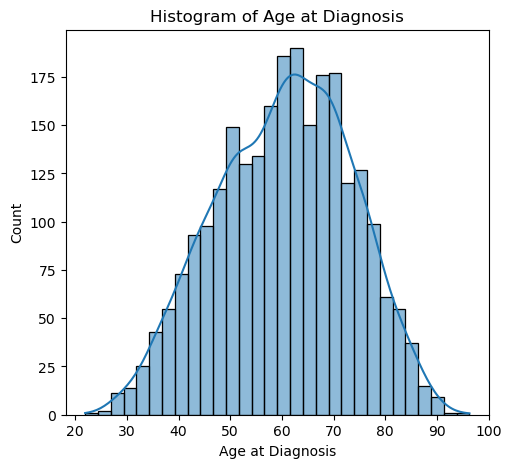

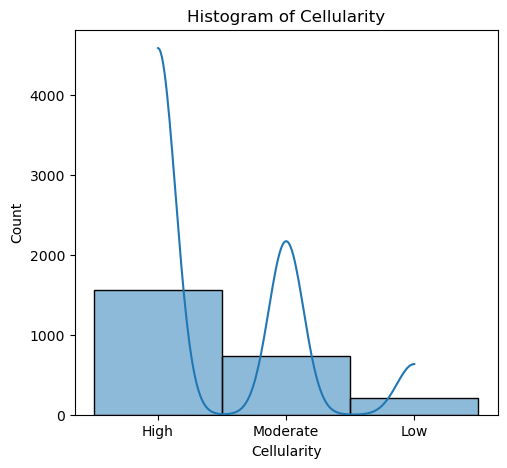

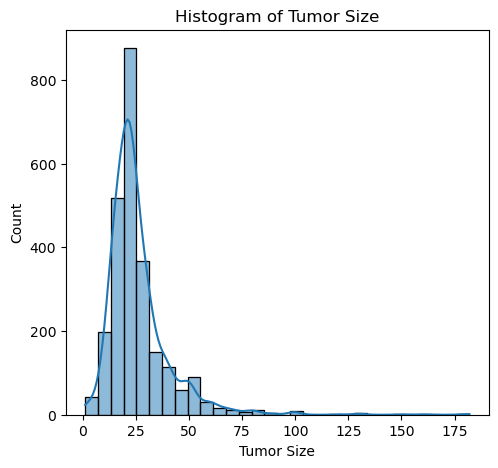

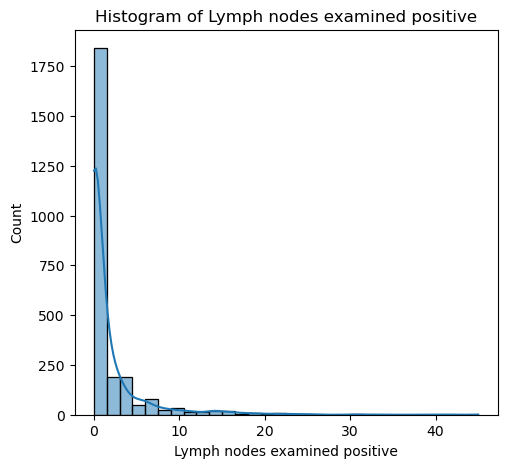

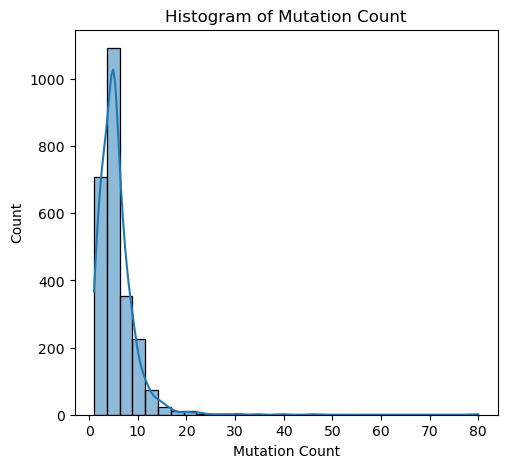

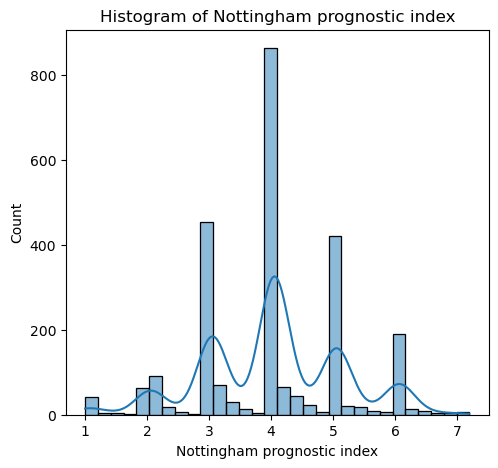

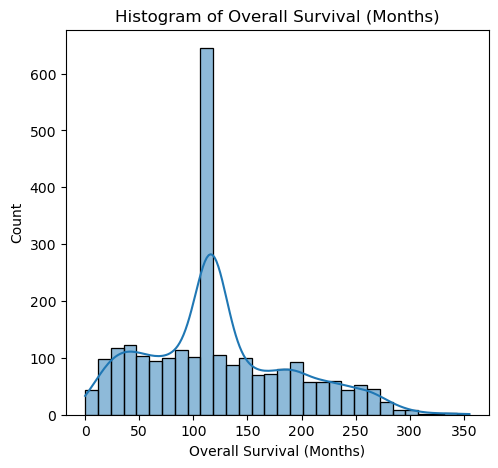

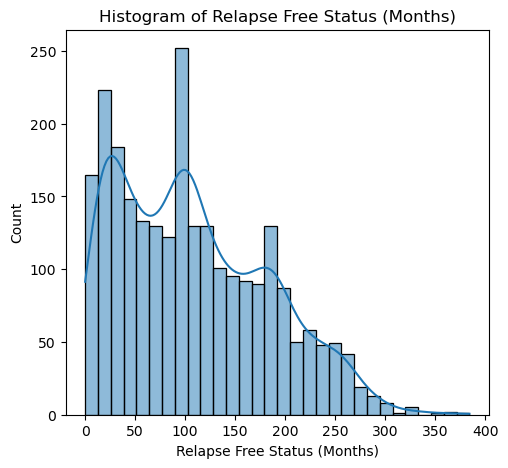

In [105]:
num_cols = ['Age at Diagnosis', 'Cellularity', 'Tumor Size', 'Lymph nodes examined positive',
            'Mutation Count', 'Nottingham prognostic index', 'Overall Survival (Months)',
            'Relapse Free Status (Months)']


for col in num_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")

plt.show()

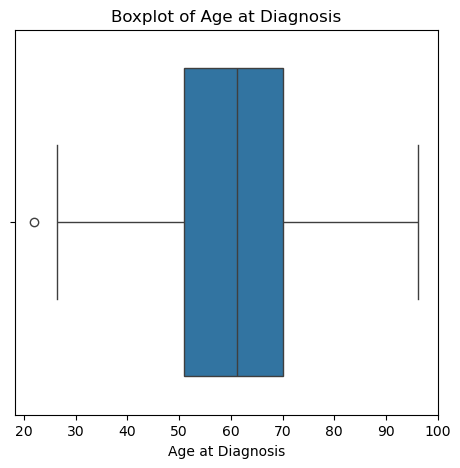

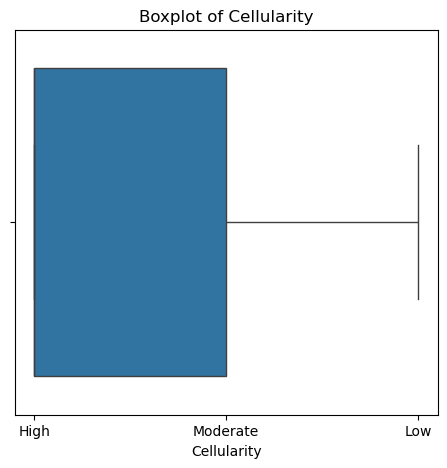

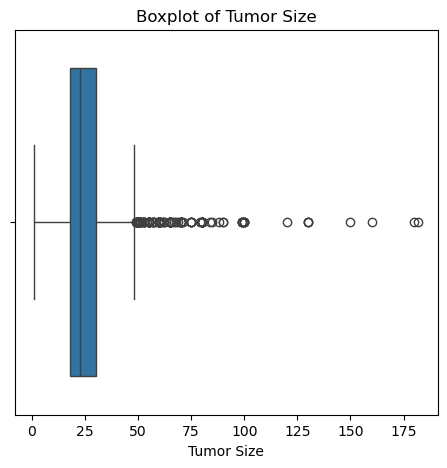

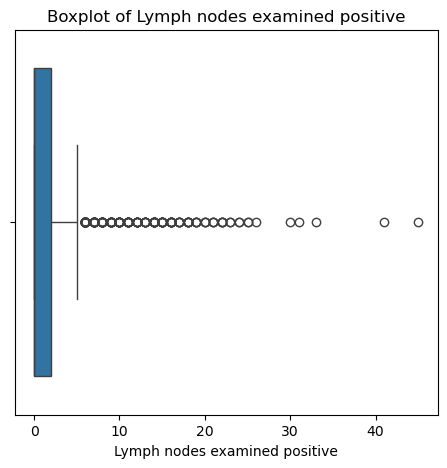

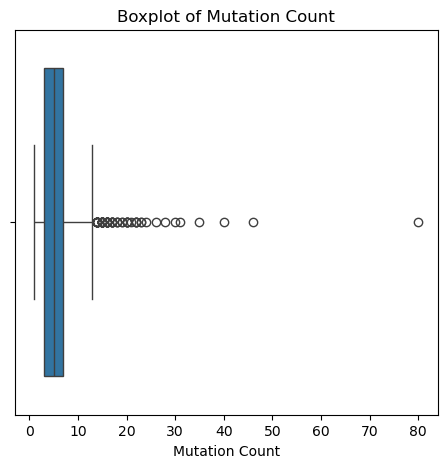

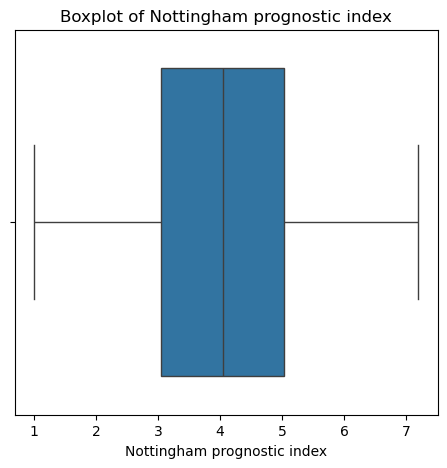

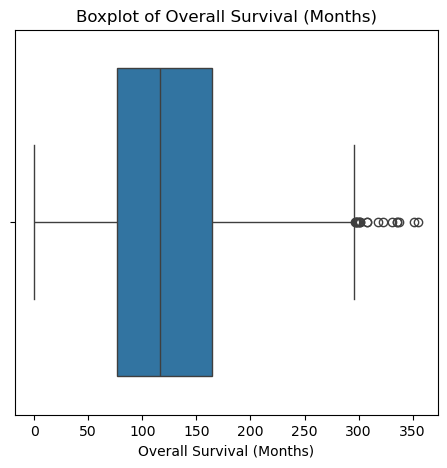

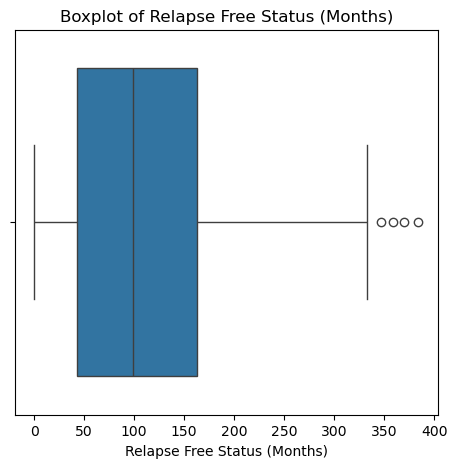

In [106]:
num_cols = ['Age at Diagnosis', 'Cellularity', 'Tumor Size', 'Lymph nodes examined positive',
            'Mutation Count', 'Nottingham prognostic index', 'Overall Survival (Months)',
            'Relapse Free Status (Months)']

for col in num_cols:
    plt.figure(figsize=(12, 5))


    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

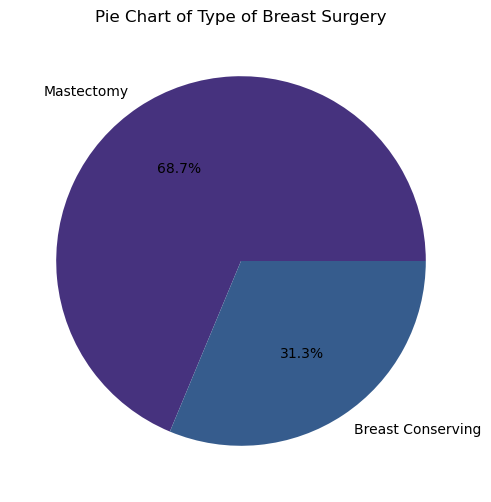

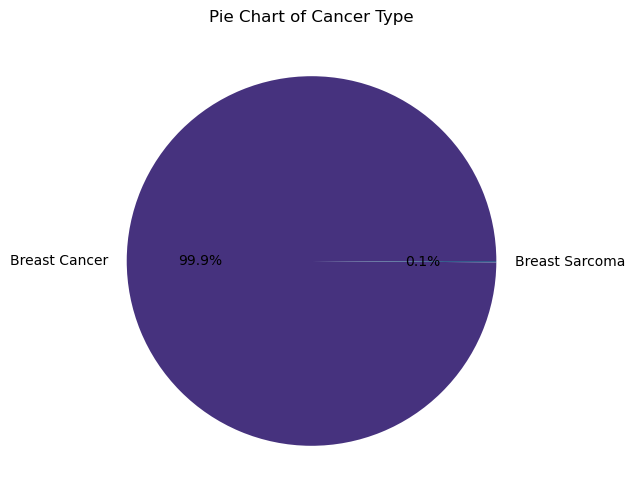

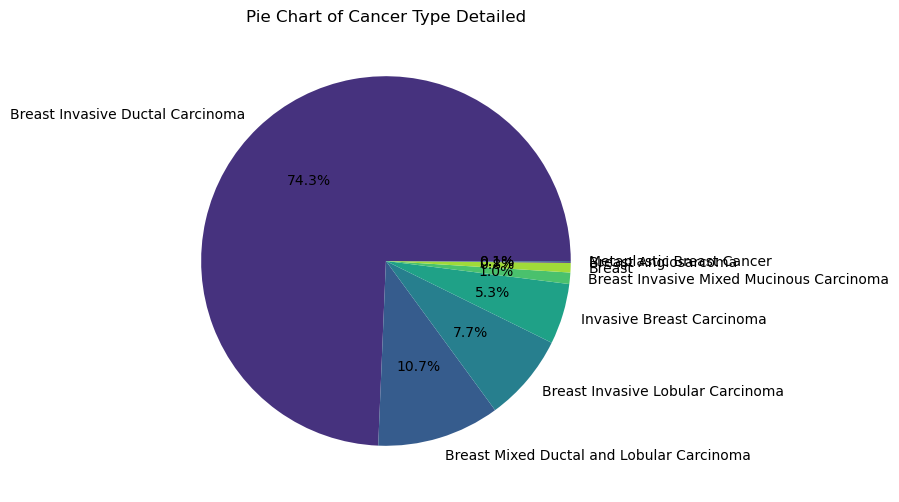

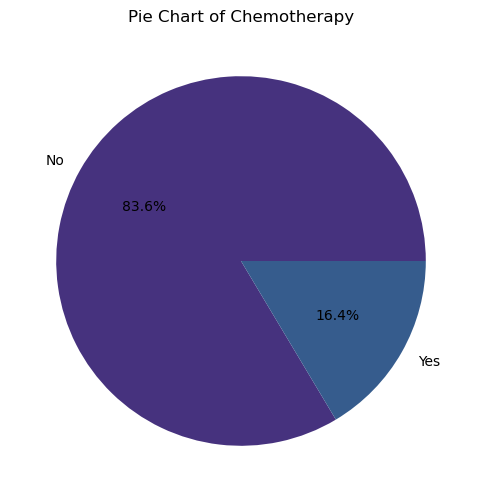

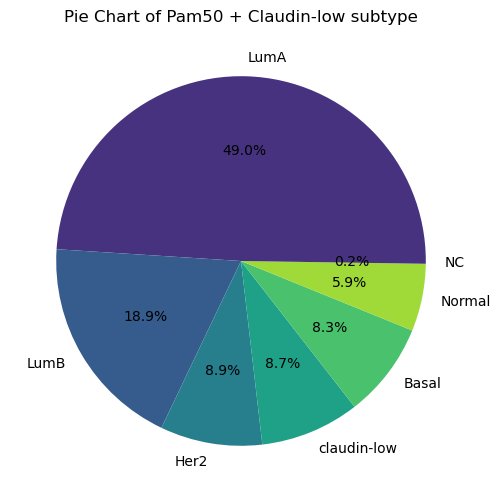

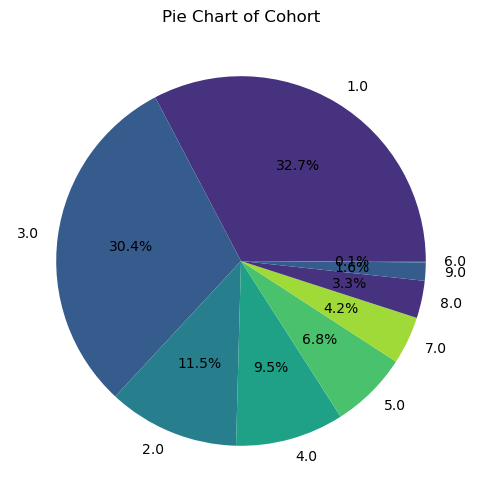

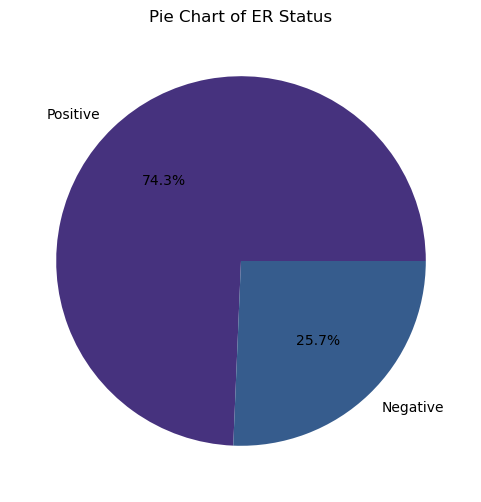

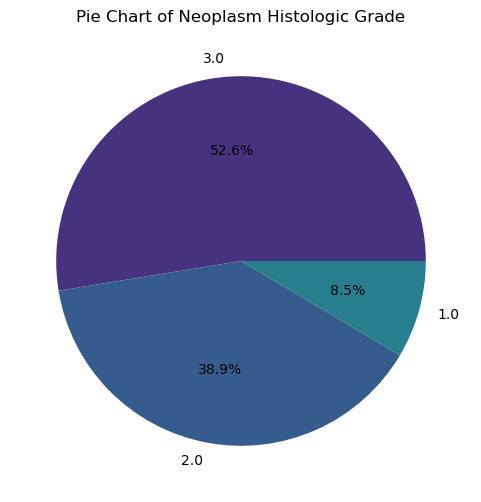

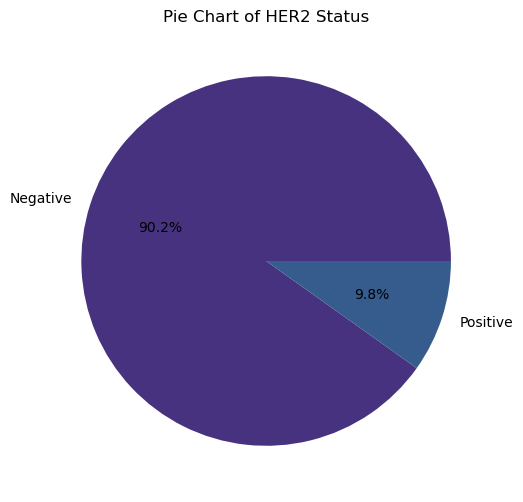

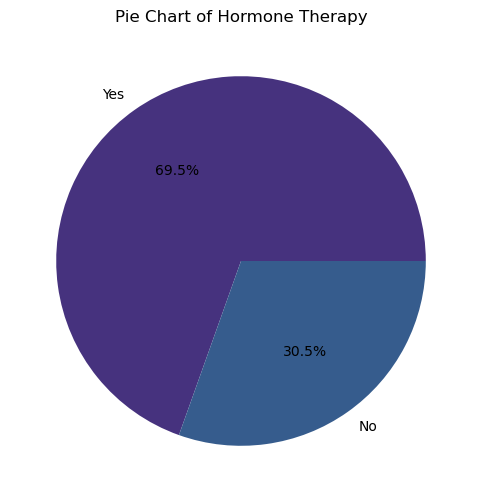

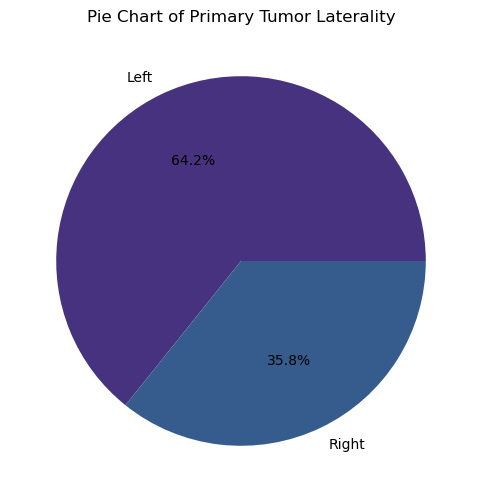

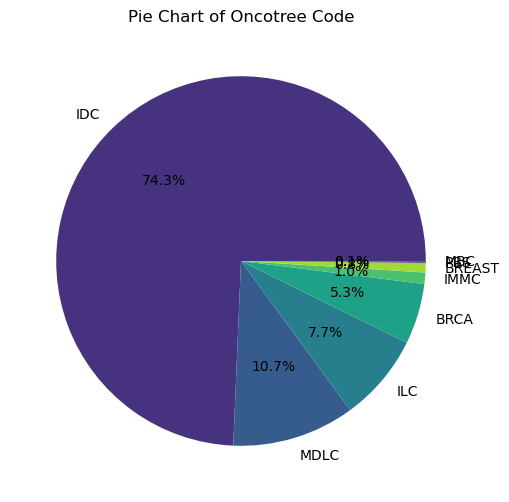

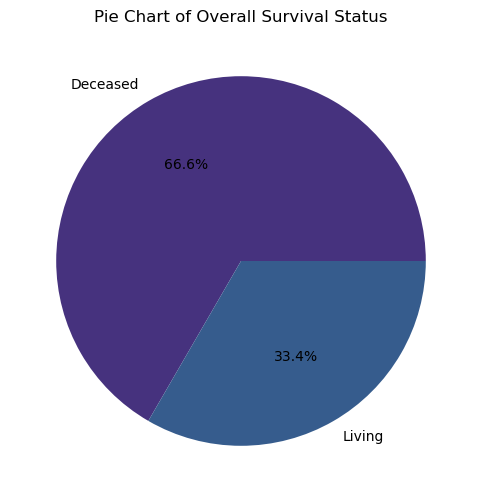

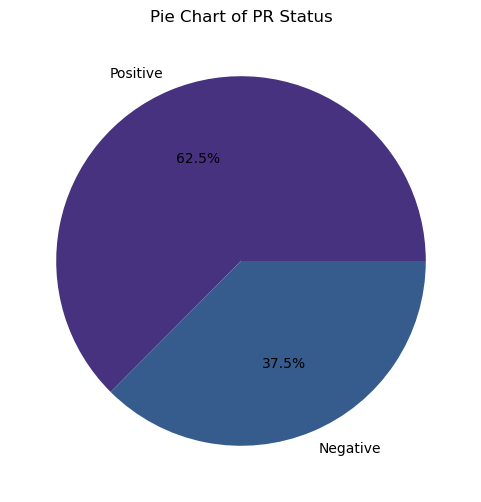

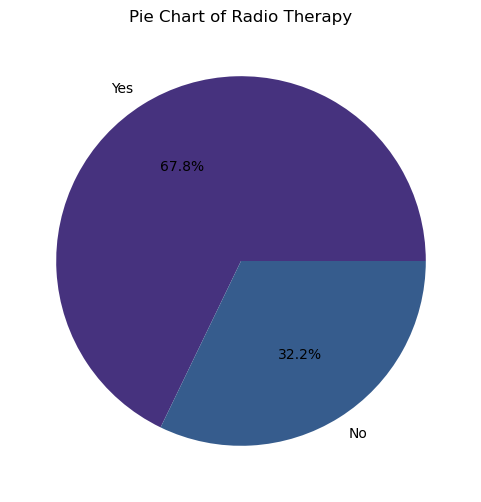

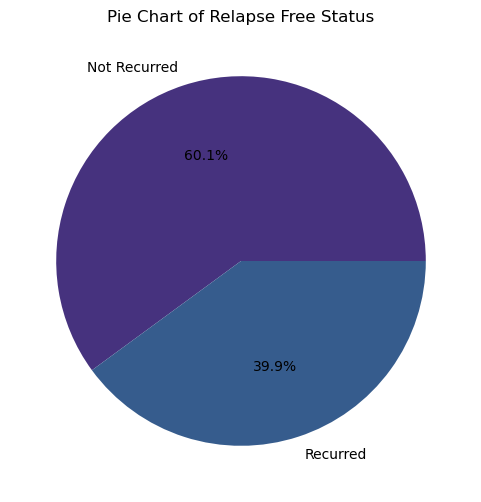

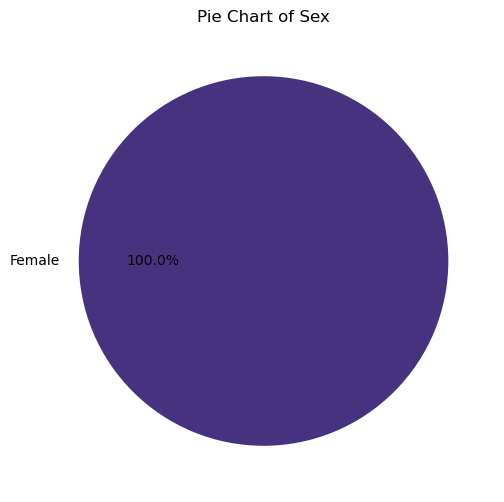

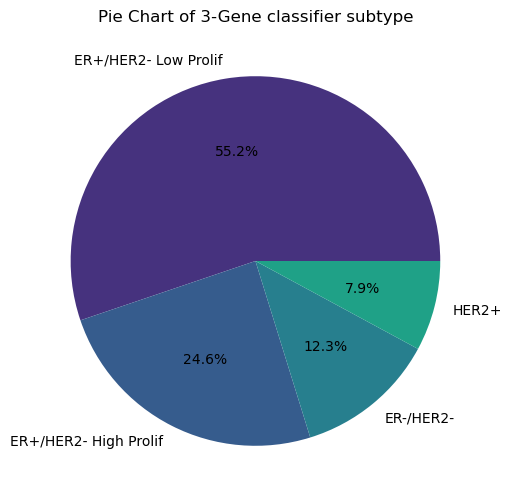

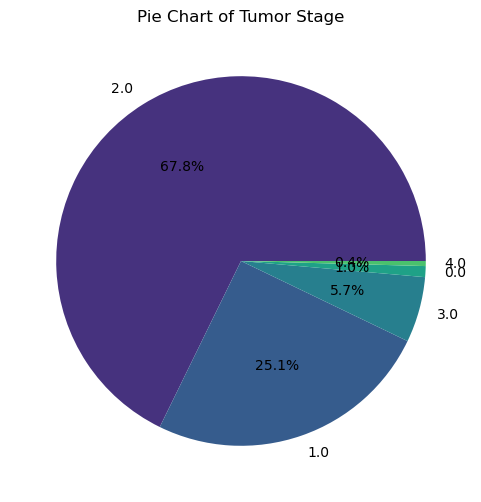

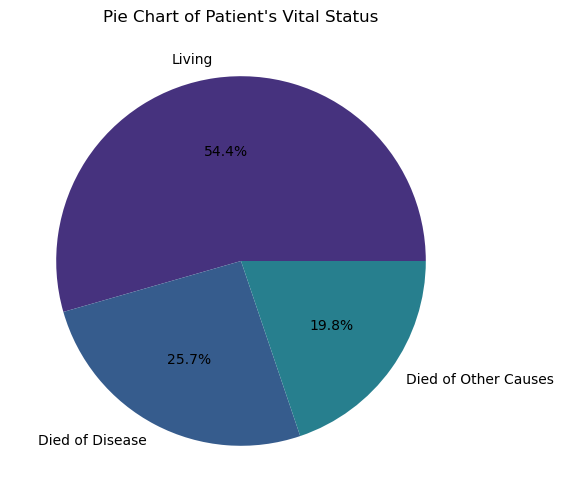

In [107]:
cat_cols = ['Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Chemotherapy',
            'Pam50 + Claudin-low subtype', 'Cohort', 'ER Status', 'Neoplasm Histologic Grade',
            'HER2 Status', 'Hormone Therapy', 'Primary Tumor Laterality', 'Oncotree Code',
            'Overall Survival Status', 'PR Status', 'Radio Therapy', 'Relapse Free Status',
            'Sex', '3-Gene classifier subtype', 'Tumor Stage', "Patient's Vital Status"]


for col in cat_cols:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette('viridis'))
    plt.title(f"Pie Chart of {col}")
    plt.ylabel('')
    plt.show()

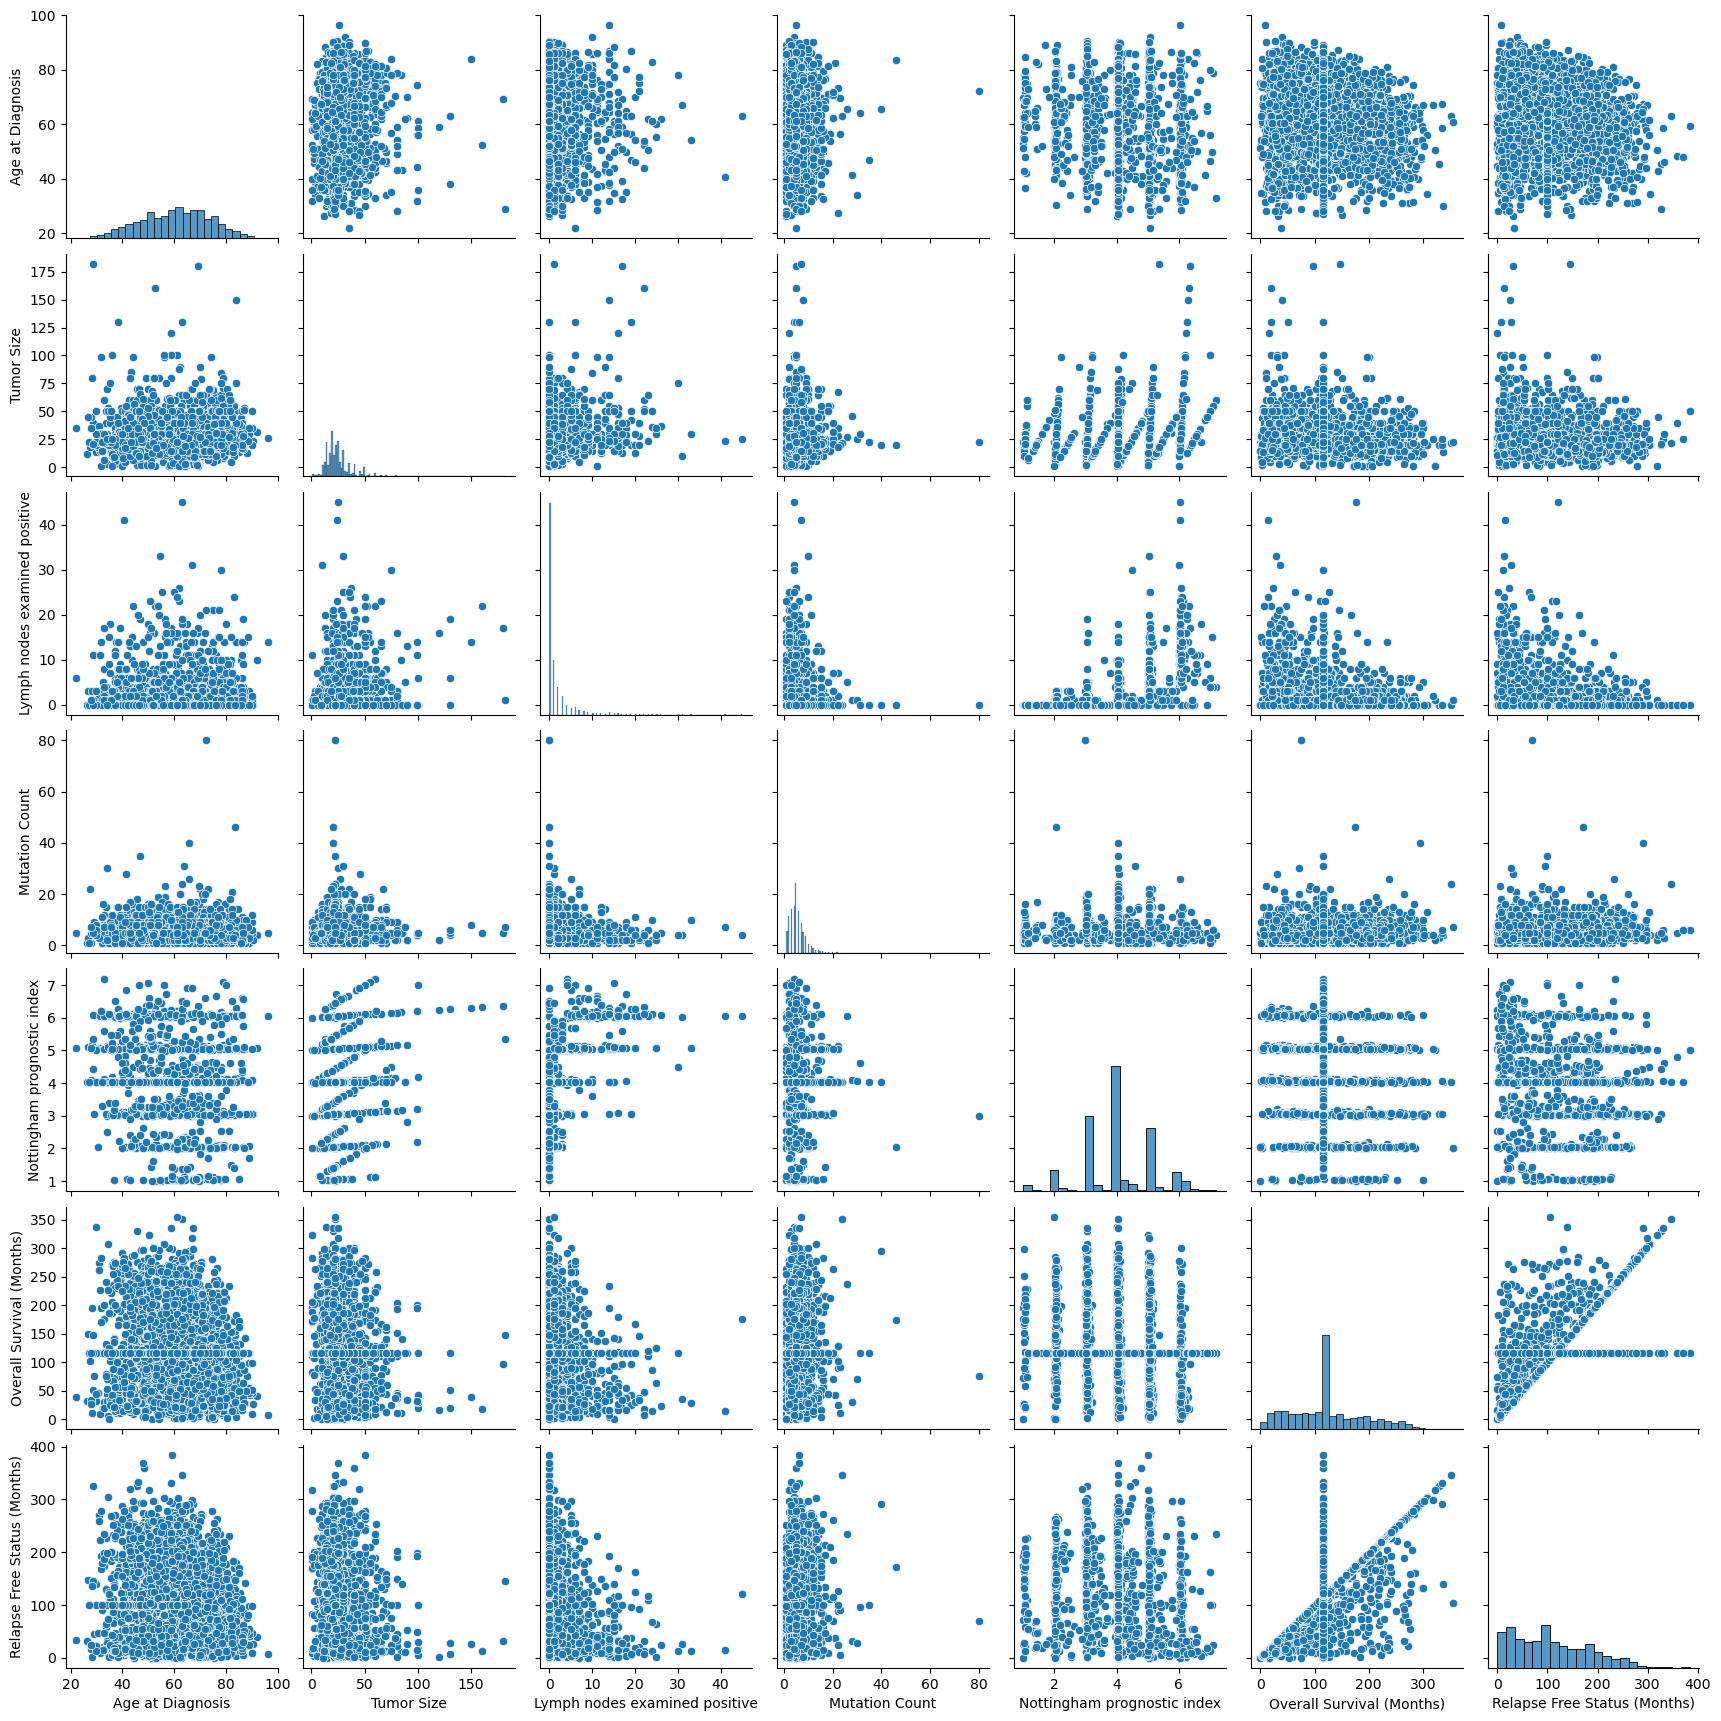

In [108]:
num_cols = ['Age at Diagnosis', 'Cellularity', 'Tumor Size', 'Lymph nodes examined positive',
            'Mutation Count', 'Nottingham prognostic index', 'Overall Survival (Months)',
            'Relapse Free Status (Months)']


sns.pairplot(df[num_cols])
plt.show()

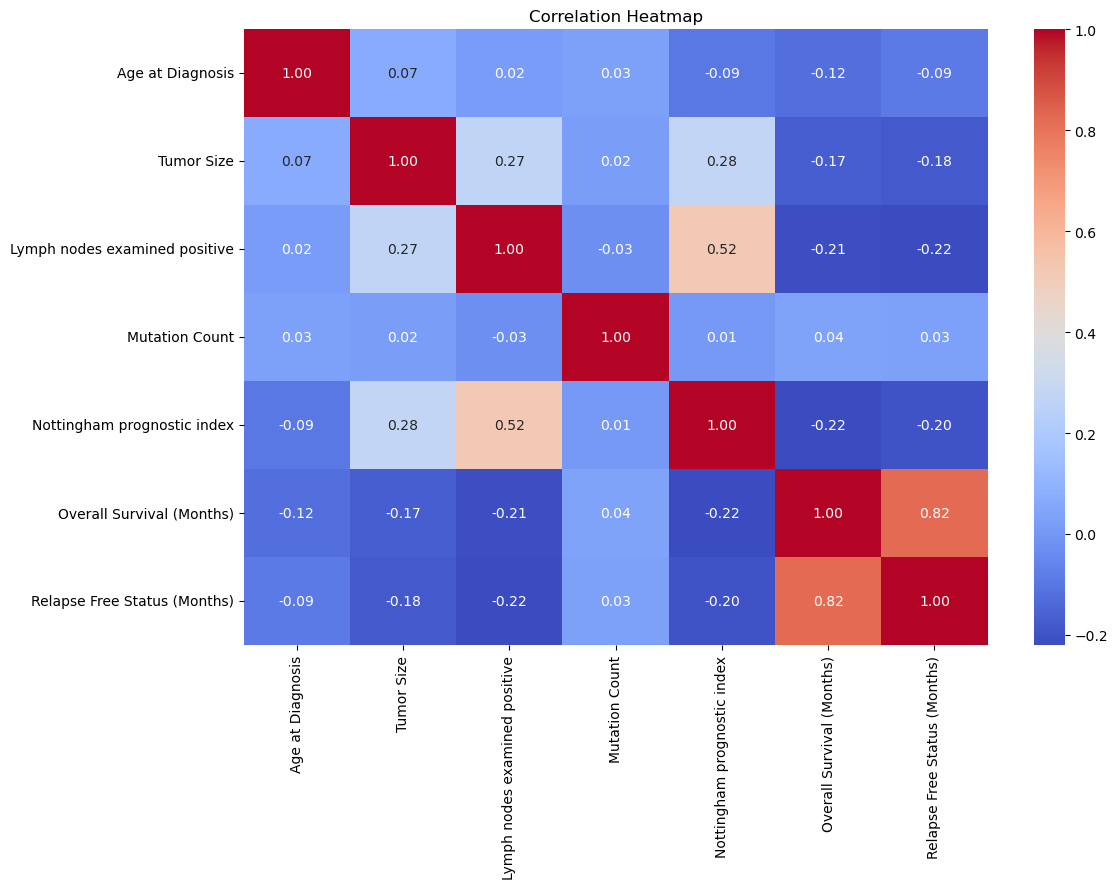

In [109]:
num_cols = ['Age at Diagnosis','Tumor Size', 'Lymph nodes examined positive',
            'Mutation Count', 'Nottingham prognostic index', 'Overall Survival (Months)',
            'Relapse Free Status (Months)']

plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

plt.show()

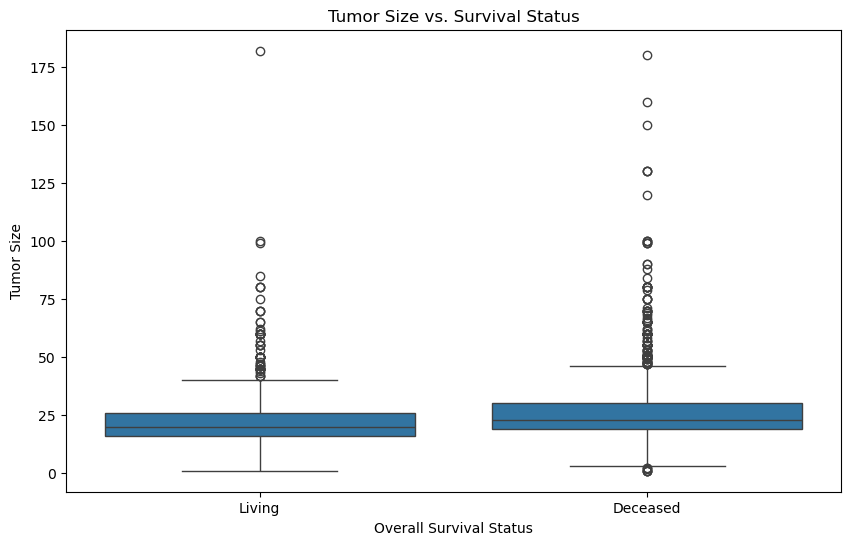

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Overall Survival Status", y="Tumor Size", data=df)
plt.title("Tumor Size vs. Survival Status")
plt.show()

C:\Users\donga\AppData\Local\Temp\ipykernel_18572\1034539127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="ER Status", y="Overall Survival (Months)", data=df, palette="muted")


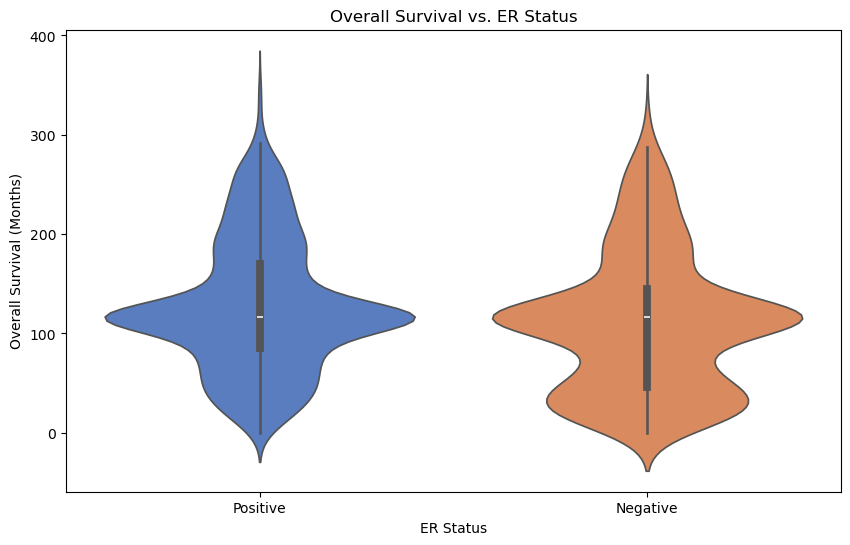

In [111]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="ER Status", y="Overall Survival (Months)", data=df, palette="muted")
plt.title("Overall Survival vs. ER Status")
plt.show()

C:\Users\donga\AppData\Local\Temp\ipykernel_18572\3171429319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Patient's Vital Status", y="Tumor Size", data=df, palette="muted")


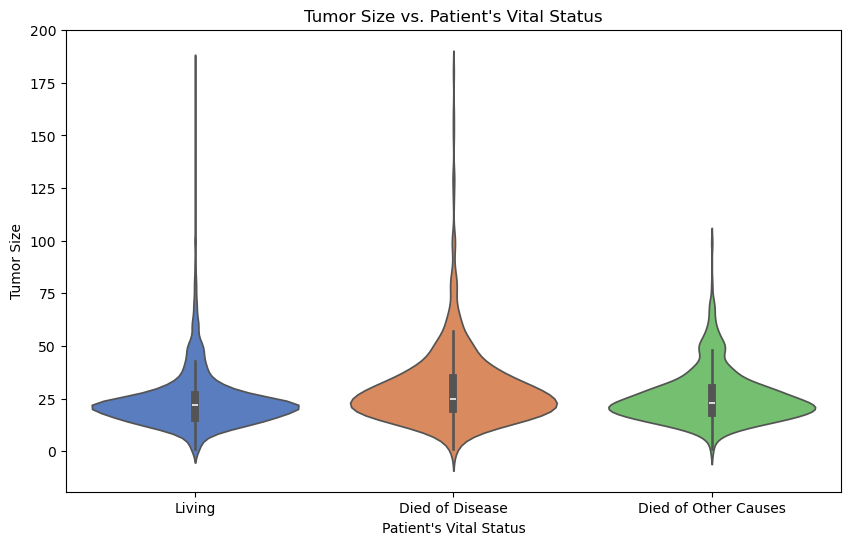

In [112]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Patient's Vital Status", y="Tumor Size", data=df, palette="muted")
plt.title("Tumor Size vs. Patient's Vital Status")
plt.show()

C:\Users\donga\AppData\Local\Temp\ipykernel_18572\472531002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Tumor Stage", y="Age at Diagnosis", data=df, palette="muted")


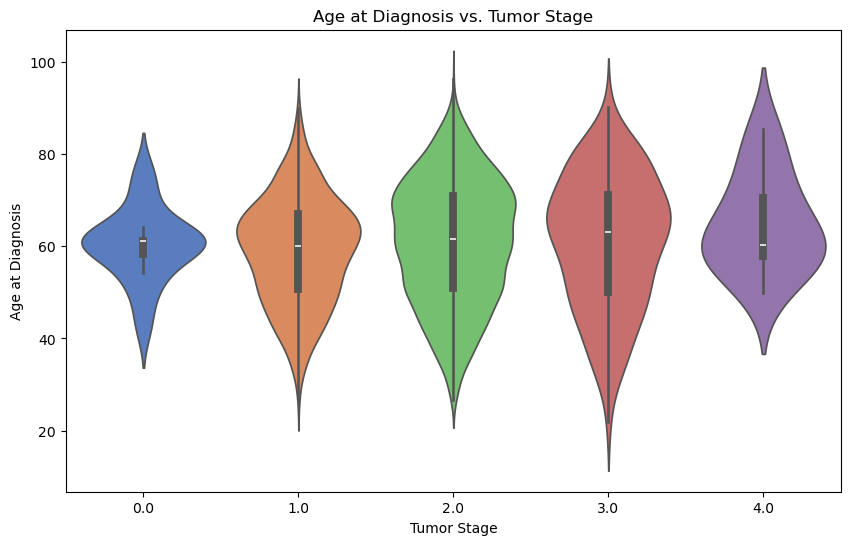

In [113]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Tumor Stage", y="Age at Diagnosis", data=df, palette="muted")
plt.title("Age at Diagnosis vs. Tumor Stage")
plt.show()

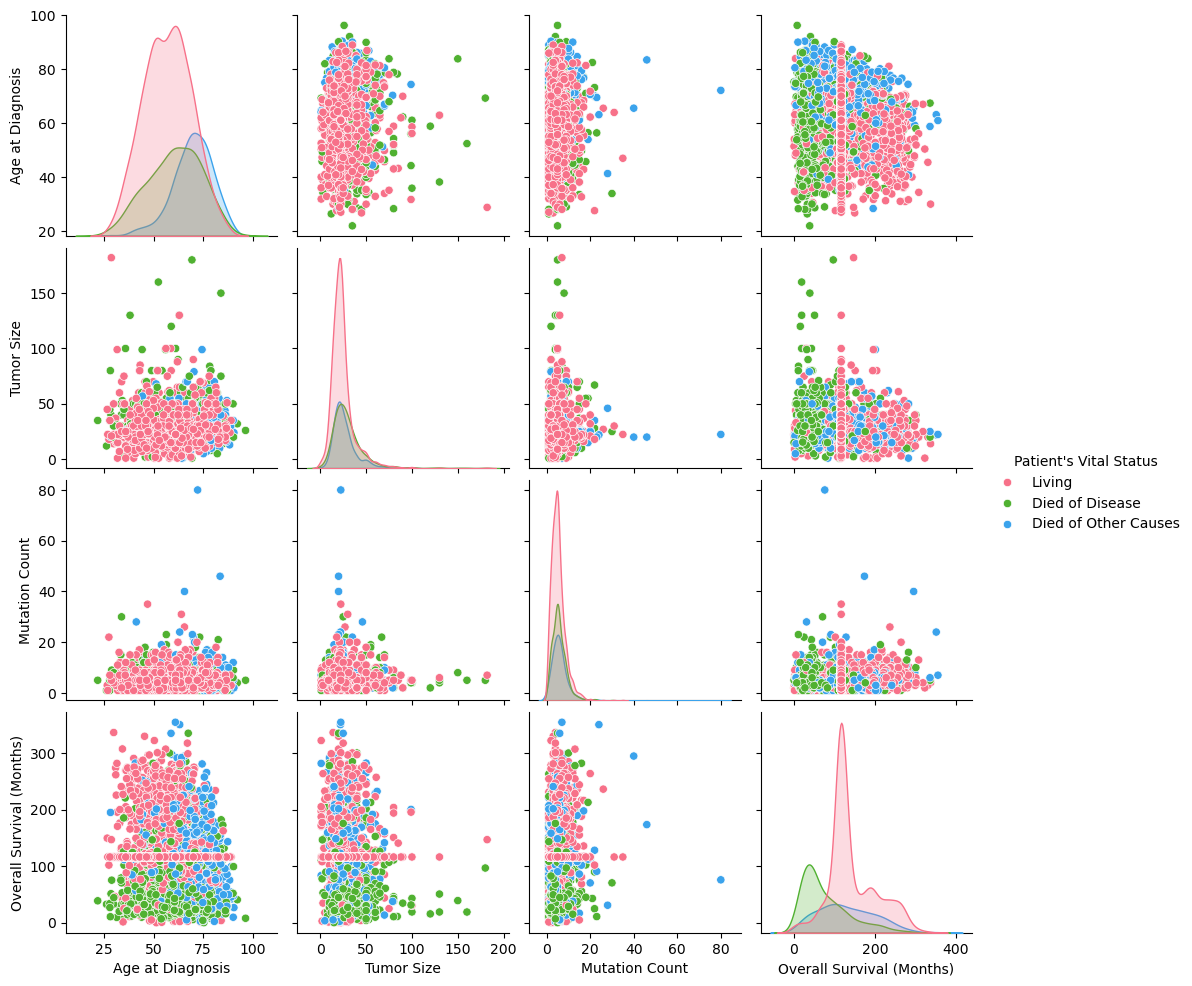

In [114]:
num_cols = ['Age at Diagnosis', 'Tumor Size', 'Mutation Count', 'Overall Survival (Months)']
sns.pairplot(df, vars=num_cols, hue="Patient's Vital Status", palette="husl")

plt.show()

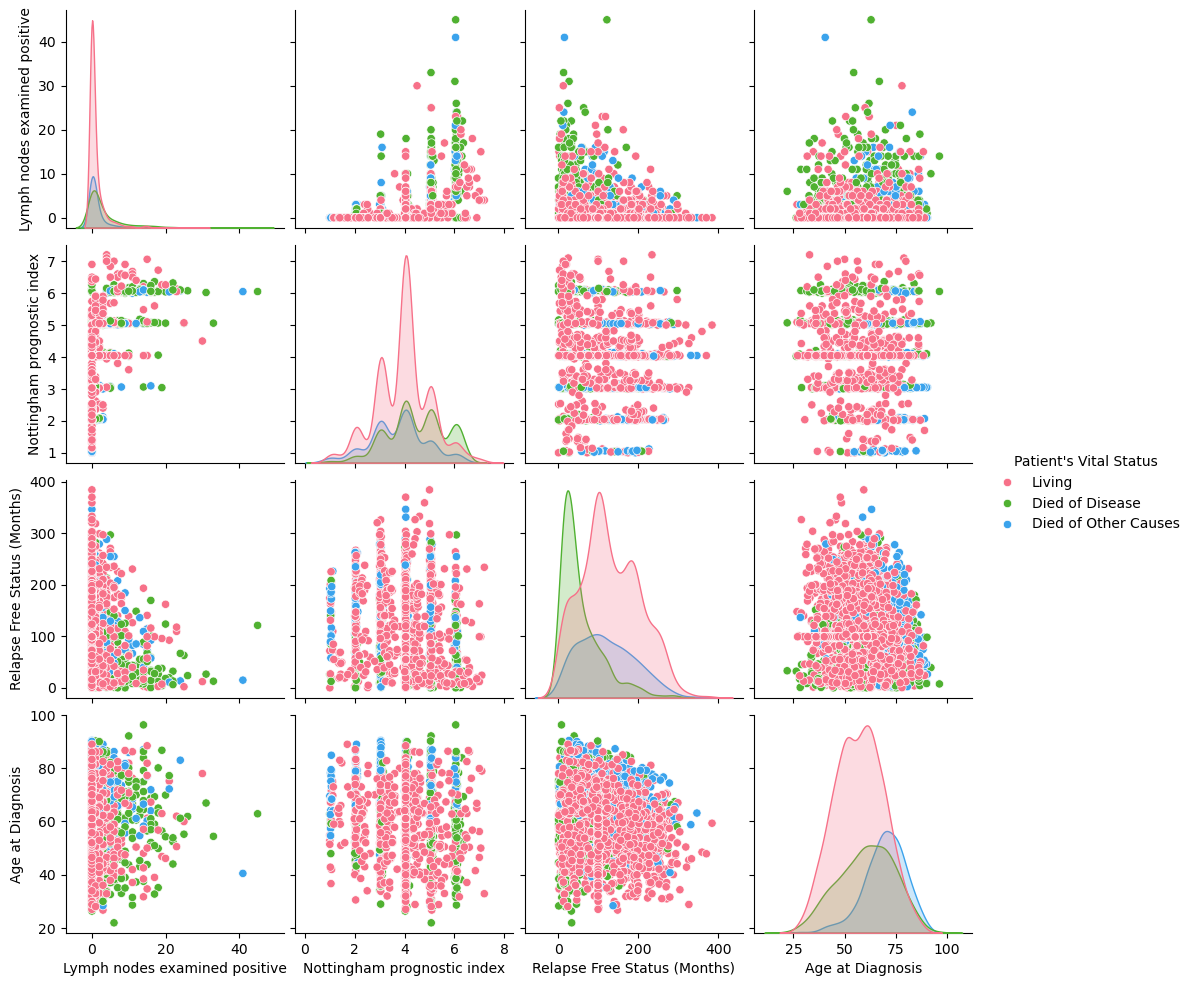

In [115]:
num_cols = ['Lymph nodes examined positive', 'Nottingham prognostic index', 'Relapse Free Status (Months)', 'Age at Diagnosis']
sns.pairplot(df, vars=num_cols, hue="Patient's Vital Status", palette="husl")

plt.show()

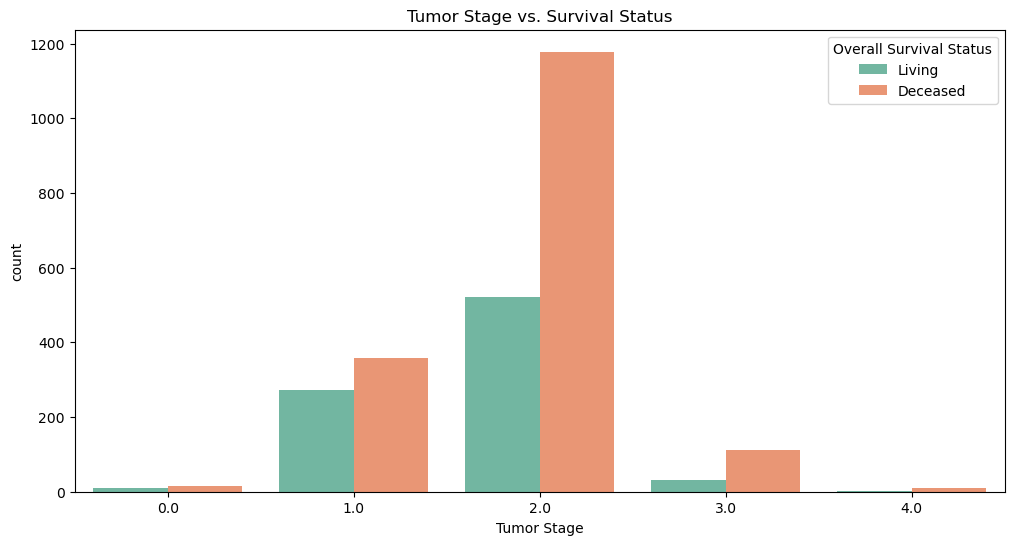

In [116]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Tumor Stage", hue="Overall Survival Status", data=df, palette="Set2", dodge=True)
plt.title("Tumor Stage vs. Survival Status")

plt.show()

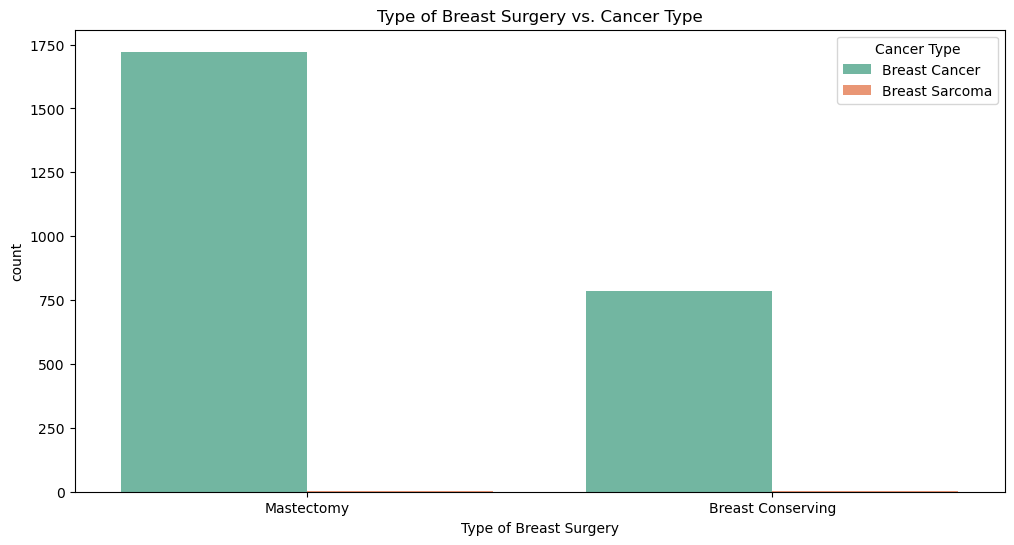

In [117]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Type of Breast Surgery", hue="Cancer Type", data=df, palette="Set2", dodge=True)
plt.title("Type of Breast Surgery vs. Cancer Type")

plt.show()

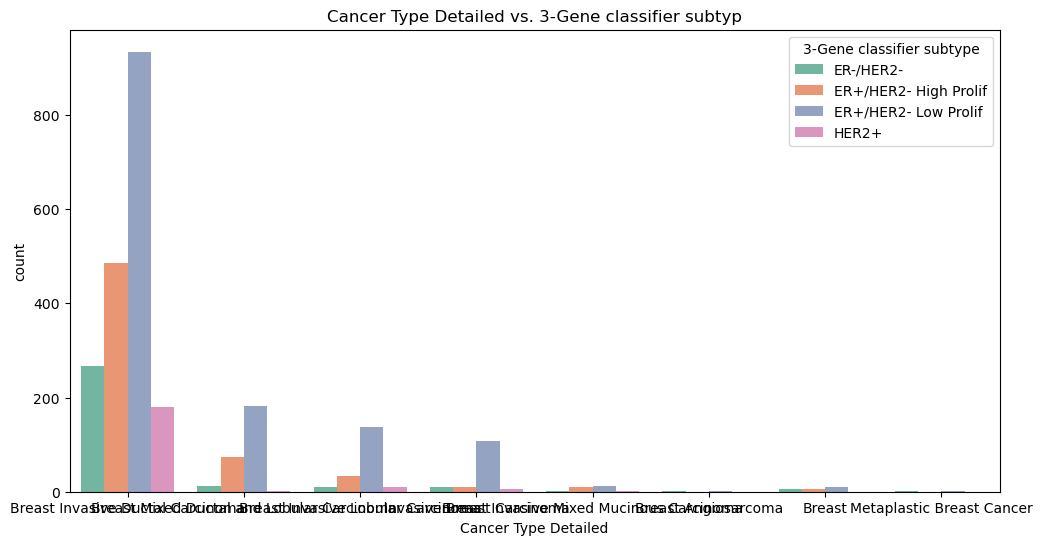

In [118]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Cancer Type Detailed", hue="3-Gene classifier subtype", data=df, palette="Set2", dodge=True)
plt.title("Cancer Type Detailed vs. 3-Gene classifier subtyp")

plt.show()

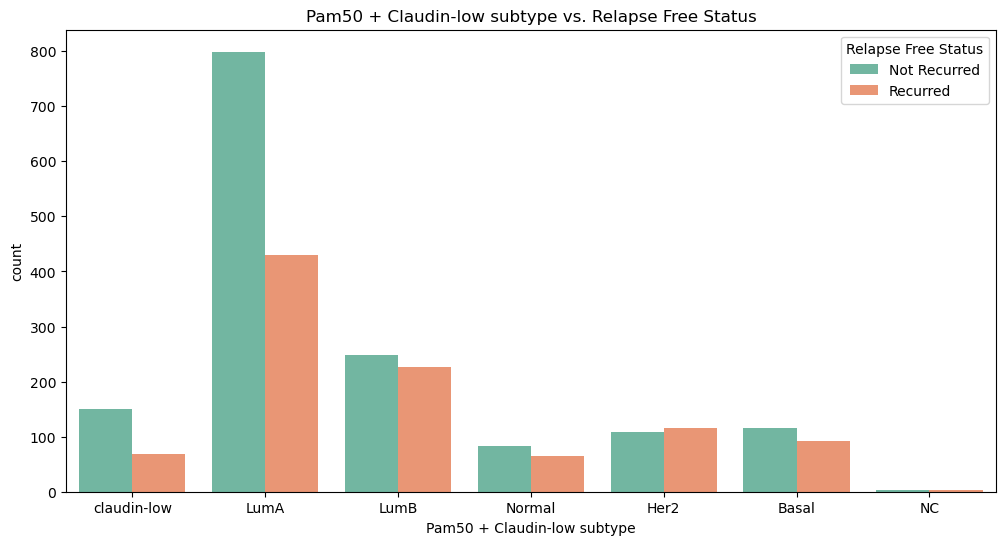

In [119]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Pam50 + Claudin-low subtype", hue="Relapse Free Status", data=df, palette="Set2", dodge=True)
plt.title("Pam50 + Claudin-low subtype vs. Relapse Free Status")

plt.show()

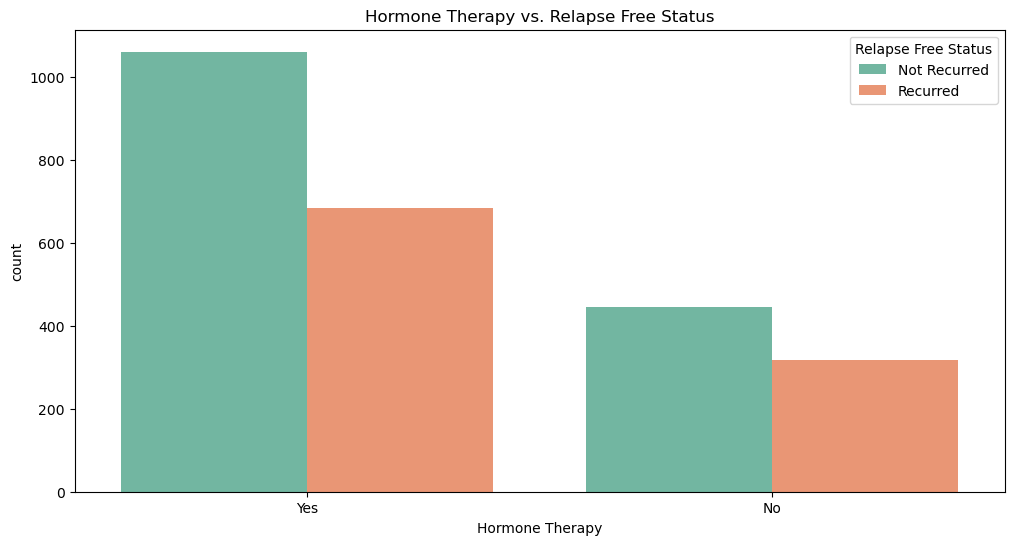

In [120]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Hormone Therapy", hue="Relapse Free Status", data=df, palette="Set2", dodge=True)
plt.title("Hormone Therapy vs. Relapse Free Status")

plt.show()

In [121]:
numerical_features = ['Age at Diagnosis', 'Tumor Size', 'Mutation Count', 
                      'Nottingham prognostic index', 'Overall Survival (Months)', 
                      'Relapse Free Status (Months)', 'Lymph nodes examined positive'] 


scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [122]:
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [123]:
scaler = RobustScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


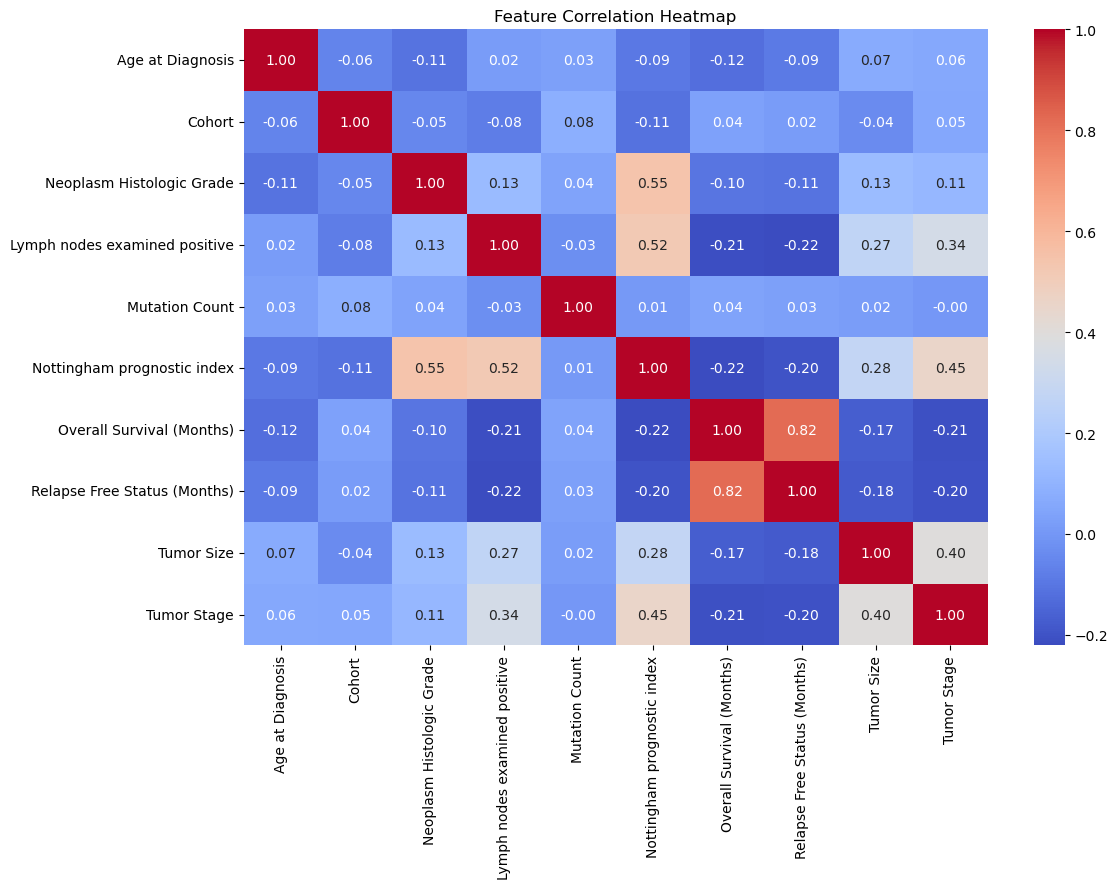

In [124]:
df_numeric = df.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show() 

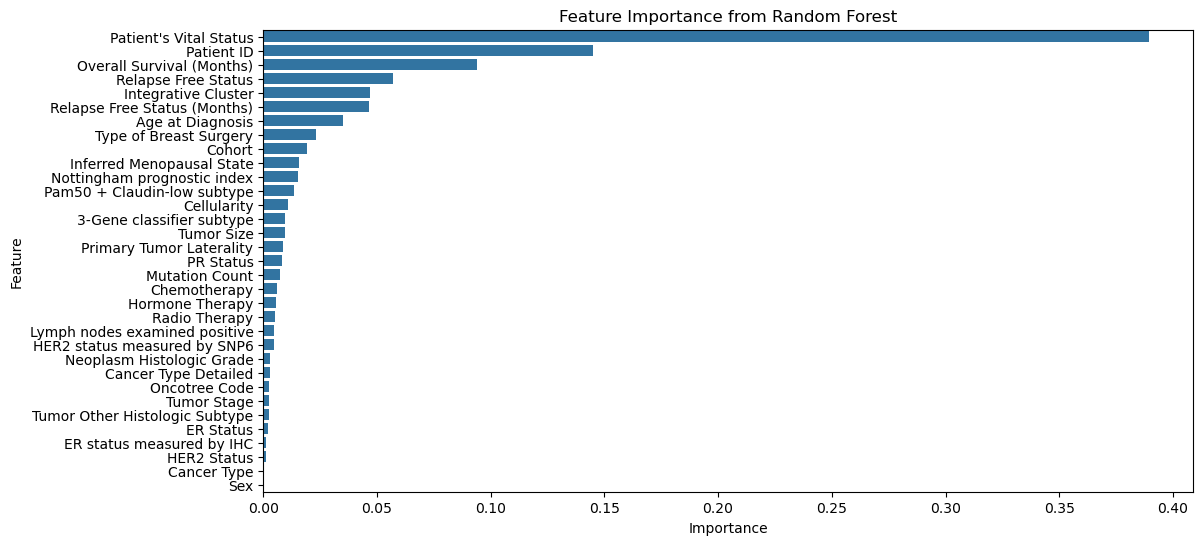

In [125]:
if 'Overall Survival Status' in df.columns:
    X = df.drop(columns=['Overall Survival Status'])  # Define features
    y = df['Overall Survival Status'].map({'Living': 1, 'Deceased': 0})  # Convert target
else:
    print("Column 'Overall Survival Status' not found in dataset.")
    
cat_cols = X.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance from Random Forest")
plt.show()


In [126]:
df = pd.get_dummies(df, columns=[
    'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity',
    'Chemotherapy', 'Pam50 + Claudin-low subtype', 'ER status measured by IHC', 'ER Status',
    'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype',
    'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality',
    'Oncotree Code', 'Overall Survival Status', 'PR Status', 'Radio Therapy', 'Relapse Free Status', 
    'Sex', '3-Gene classifier subtype', "Patient's Vital Status"], drop_first=True)
df

Patient ID  Age at Diagnosis  Cohort  Neoplasm Histologic Grade  \
0       MB-0000          0.762854     1.0                        3.0   
1       MB-0002         -0.940189     1.0                        3.0   
2       MB-0005         -0.642183     1.0                        2.0   
3       MB-0006         -0.704617     1.0                        2.0   
4       MB-0008          0.832109     1.0                        3.0   
...         ...               ...     ...                        ...   
2504  MTS-T2428          0.469045     1.0                        1.0   
2505  MTS-T2429          0.130640     1.0                        2.0   
2506  MTS-T2430          0.000000     1.0                        3.0   
2507  MTS-T2431          0.000000     1.0                        3.0   
2508  MTS-T2432          0.000000     1.0                        3.0   

      Lymph nodes examined positive  Mutation Count  \
0                               5.0            0.00   
1                               0.0           -0.75   
2                               0.5           -0.75   
3                               1.5           -1.00   
4                               4.0           -0.75   
...                             ...             ...   
2504                            0.0           -0.75   
2505                            0.0           -0.25   
2506                            0.0            0.25   
2507                            0.0            0.50   
2508                            0.0            0.00   

      Nottingham prognostic index  Overall Survival (Months)  \
0                        1.008065                   0.272796   
1                       -0.012097                  -0.361332   
2                       -0.007056                   0.536133   
3                        0.003024                   0.550132   
4                        1.026210                  -0.852440   
...                           ...                        ...   
2504                    -0.758065                   0.000000   
2505                     0.260081                   0.000000   
2506                     0.000000                   0.000000   
2507                     0.000000                   0.000000   
2508                     0.000000                   0.000000   

      Relapse Free Status (Months)  Tumor Size  ...  Oncotree Code_PBS  \
0                         0.328012   -0.034167  ...              False   
1                        -0.129157   -1.034167  ...              False   
2                         0.432747   -0.617500  ...              False   
3                         0.527946    0.215833  ...              False   
4                        -0.667924    1.465833  ...              False   
...                            ...         ...  ...                ...   
2504                     -0.780869    0.382500  ...              False   
2505                     -0.687578    0.465833  ...              False   
2506                      0.000000    0.000000  ...              False   
2507                      0.000000    0.000000  ...              False   
2508                      0.000000    0.000000  ...              False   

      Overall Survival Status_Living  PR Status_Positive  Radio Therapy_Yes  \
0                               True               False               True   
1                               True                True               True   
2                              False                True              False   
3                               True                True               True   
4                              False                True               True   
...                              ...                 ...                ...   
2504                           False                True               True   
2505                           False                True               True   
2506                           False                True               True   
2507                           

In [127]:
df.columns

Index(['Patient ID', 'Age at Diagnosis', 'Cohort', 'Neoplasm Histologic Grade',
       'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index', 'Overall Survival (Months)',
       'Relapse Free Status (Months)', 'Tumor Size', 'Tumor Stage',
       'Type of Breast Surgery_Mastectomy', 'Cancer Type_Breast Sarcoma',
       'Cancer Type Detailed_Breast Angiosarcoma',
       'Cancer Type Detailed_Breast Invasive Ductal Carcinoma',
       'Cancer Type Detailed_Breast Invasive Lobular Carcinoma',
       'Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma',
       'Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma',
       'Cancer Type Detailed_Invasive Breast Carcinoma',
       'Cancer Type Detailed_Metaplastic Breast Cancer', 'Cellularity_Low',
       'Cellularity_Moderate', 'Chemotherapy_Yes',
       'Pam50 + Claudin-low subtype_Her2', 'Pam50 + Claudin-low subtype_LumA',
       'Pam50 + Claudin-low subtype_LumB', 'Pam50 + Claudin-low s

In [128]:
X = df[['Age at Diagnosis', 'Cohort', 'Neoplasm Histologic Grade',
       'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index','Relapse Free Status (Months)', 'Tumor Size', 'Tumor Stage',
       'Type of Breast Surgery_Mastectomy', 'Cancer Type_Breast Sarcoma',
       'Cancer Type Detailed_Breast Angiosarcoma',
       'Cancer Type Detailed_Breast Invasive Ductal Carcinoma',
       'Cancer Type Detailed_Breast Invasive Lobular Carcinoma',
       'Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma',
       'Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma',
       'Cancer Type Detailed_Invasive Breast Carcinoma',
       'Cancer Type Detailed_Metaplastic Breast Cancer', 'Cellularity_Low',
       'Cellularity_Moderate', 'Chemotherapy_Yes',
       'Pam50 + Claudin-low subtype_Her2', 'Pam50 + Claudin-low subtype_LumA',
       'Pam50 + Claudin-low subtype_LumB', 'Pam50 + Claudin-low subtype_NC',
       'Pam50 + Claudin-low subtype_Normal','Pam50 + Claudin-low subtype_claudin-low',
       'ER status measured by IHC_Positve', 'ER Status_Positive',
       'HER2 status measured by SNP6_Loss','HER2 status measured by SNP6_Neutral',
       'HER2 status measured by SNP6_Undef', 'HER2 Status_Positive',
       'Tumor Other Histologic Subtype_Lobular','Tumor Other Histologic Subtype_Medullary',
       'Tumor Other Histologic Subtype_Metaplastic','Tumor Other Histologic Subtype_Mixed',
       'Tumor Other Histologic Subtype_Mucinous','Tumor Other Histologic Subtype_Other',
       'Tumor Other Histologic Subtype_Tubular/ cribriform','Hormone Therapy_Yes', 
       'Inferred Menopausal State_Pre','Integrative Cluster_10', 'Integrative Cluster_2',
       'Integrative Cluster_3', 'Integrative Cluster_4ER+','Integrative Cluster_4ER-', 
       'Integrative Cluster_5','Integrative Cluster_6', 'Integrative Cluster_7',
       'Integrative Cluster_8', 'Integrative Cluster_9','Primary Tumor Laterality_Right', 'Oncotree Code_BREAST',
       'Oncotree Code_IDC', 'Oncotree Code_ILC', 'Oncotree Code_IMMC','Overall Survival (Months)',
       'Oncotree Code_MBC', 'Oncotree Code_MDLC', 'Oncotree Code_PBS','PR Status_Positive',
       'Radio Therapy_Yes', 'Relapse Free Status_Recurred',
       '3-Gene classifier subtype_ER+/HER2- Low Prolif','3-Gene classifier subtype_ER-/HER2-',
       '3-Gene classifier subtype_HER2+','Patient\'s Vital Status_Died of Other Causes',
       'Patient\'s Vital Status_Living']]
y = df['Overall Survival Status_Living']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:
model = LogisticRegression(random_state=42) 

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] }


In [132]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [134]:
best_params = grid_search.best_params_
best_params

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [135]:
best_model = LogisticRegression(random_state=42, **best_params)
best_model.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

In [136]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [137]:
print(f"Best Hyperparameters: {best_params}")
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Model Accuracy on Test Data: 1.00


In [138]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[342   0]
 [  2 158]]


In [139]:
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       342
        True       1.00      0.99      0.99       160

    accuracy                           1.00       502
   macro avg       1.00      0.99      1.00       502
weighted avg       1.00      1.00      1.00       502



In [140]:
best_model = grid_search.best_estimator_

y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Use best_model instead of model
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)


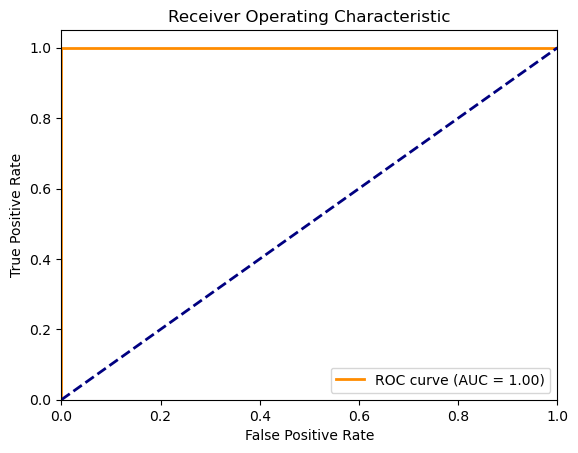

In [141]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [142]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],  
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'gamma': ['scale', 'auto'],  
    'class_weight': [None, 'balanced']}  


svm_model = SVC(probability=True) 

In [143]:
grid_search = GridSearchCV(svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [144]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.9975074750933611


In [145]:
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', kernel='linear', probability=True)

In [146]:
y_pred = best_svm.predict(X_test)
y_pred_prob = best_svm.predict_proba(X_test)[:, 1]


In [147]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Optimized Accuracy:", accuracy)
print("Optimized ROC-AUC Score:", roc_auc)

Optimized Accuracy: 0.9960159362549801
Optimized ROC-AUC Score: 0.9999634502923976


In [148]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[341   1]
 [  1 159]]


In [149]:
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       342
        True       0.99      0.99      0.99       160

    accuracy                           1.00       502
   macro avg       1.00      1.00      1.00       502
weighted avg       1.00      1.00      1.00       502



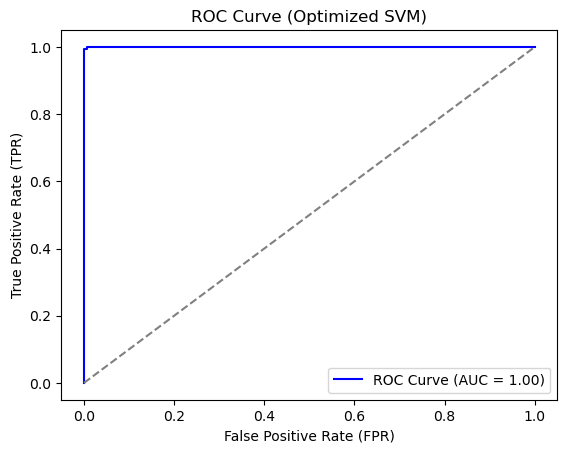

In [150]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve (Optimized SVM)")
plt.legend()
plt.show()


In [151]:
clf = DecisionTreeClassifier() 

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [152]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [153]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [154]:
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_split=5, random_state=42)

In [155]:
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [156]:
print(f"Best Hyperparameters: {best_params}")
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Model Accuracy on Test Data: 1.00


In [157]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[342   0]
 [  1 159]]


In [158]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       342
        True       1.00      0.99      1.00       160

    accuracy                           1.00       502
   macro avg       1.00      1.00      1.00       502
weighted avg       1.00      1.00      1.00       502



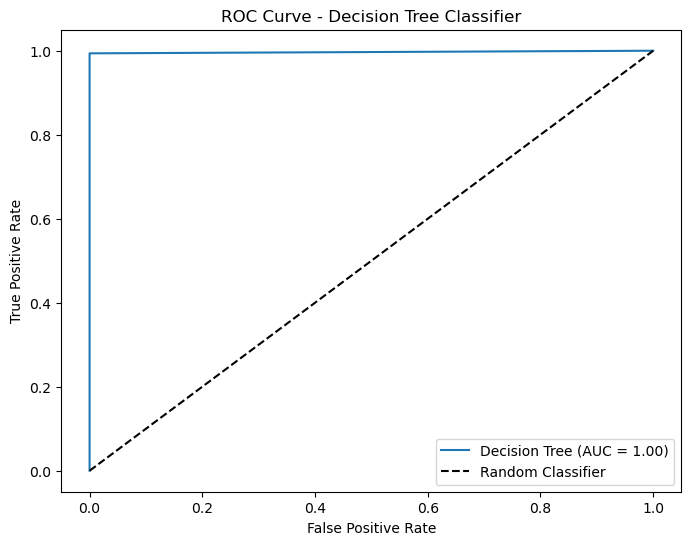

In [159]:
y_scores = best_clf.predict_proba(X_test)  

n_classes = len(np.unique(y_train))

plt.figure(figsize=(8, 6))

if n_classes == 2: 
    fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])  
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')

else:  
    y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
    
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")  

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree Classifier")
plt.legend()
plt.show()
